In [134]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [135]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [136]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [137]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
query = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


In [138]:
#  3. Convert the June temperatures to a list.
results = []
results = query

In [139]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results, columns=['date','June Temps'])
output_data_file = "june_prct.csv"
june_df.to_csv(output_data_file, index_label="date")

In [140]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [141]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
query = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [142]:
# 7. Convert the December temperatures to a list.
results = []
results = query

In [143]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results, columns=['date','December Temps'])
output_data_file = "dec_prct.csv"
dec_df.to_csv(output_data_file, index_label="date")

In [144]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Two additional queries that you would perform to gather more weather data for June and December.

In [176]:
# generate average measures by month
june_results = session.query(extract('month',Measurement.date),func.avg(Measurement.prcp),func.avg(Measurement.tobs)).\
filter(extract('month',Measurement.date)==6).all()
dec_results = session.query(extract('month',Measurement.date),func.avg(Measurement.prcp),func.avg(Measurement.tobs)).\
filter(extract('month',Measurement.date)==12).all()

In [177]:
# create df for each month
june_df = pd.DataFrame(june_results, columns=['month','Avg Precipitation','Avg Temps'])
dec_df = pd.DataFrame(dec_results, columns=['month','Avg Precipitation','Avg Temps'])

In [178]:
# concatenate df

frames = [june_df,dec_df]
tbl_df = pd.concat(frames)

In [191]:
tbl_df = tbl_df.replace(6,'June')
tbl_df = tbl_df.replace(12,'Dec')
tbl_df

,month,Avg Precipitation,Avg Temps
0,June,0.136360,74.944118
0,Dec,0.216819,71.041529


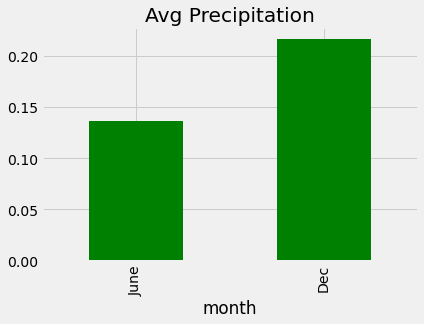

In [198]:

tbl_df.plot.bar('month','Avg Precipitation', color = "green", legend=False)
plt.title("Avg Precipitation")
plt.show()


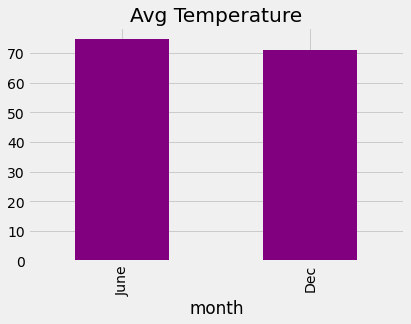

,month,Avg Precipitation,Avg Temps
0,June,0.136360,74.944118
0,Dec,0.216819,71.041529


In [209]:
tbl_df.plot.bar('month','Avg Temps', color = "purple", legend=False)
plt.title("Avg Temperature")
plt.show()
tbl_df